Aim:

SVM on multiple classes

Algorithm:

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates data points of different classes in a high-dimensional space. The goal of SVM is to maximize the margin, which is the distance between the closest points of each class (known as support vectors) to the hyperplane. SVM can efficiently handle both linear and non-linear classification problems by using different kernel functions, such as linear, polynomial, or radial basis function (RBF) kernels. Due to its ability to work well with high-dimensional data and its focus on maximizing the margin, SVM is particularly effective for tasks where the classes are clearly separated.

Code:



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,validation_curve,KFold,cross_val_score,GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784')

x,y = mnist['data'], mnist['target']

/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
df = pd.DataFrame(x)
t = pd.DataFrame(y)

In [6]:
df = df.join(t)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), float64(784)
memory usage: 418.8 MB


In [8]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
class       0
Length: 785, dtype: int64

In [10]:

train_df,test_df = train_test_split(df,random_state=42,test_size=0.4)

In [11]:

type(train_df)
train_df.info()
train_df.columns
print(len(train_df['class']))


<class 'pandas.core.frame.DataFrame'>
Index: 42000 entries, 11609 to 15795
Columns: 785 entries, pixel1 to class
dtypes: category(1), float64(784)
memory usage: 251.6 MB
42000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='class', ylabel='count'>

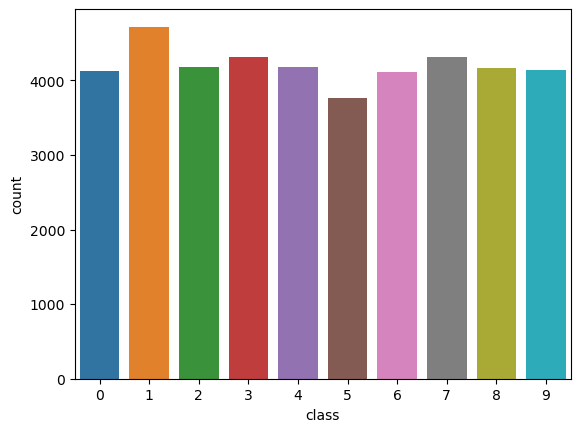

In [12]:
sns.countplot(x = train_df['class'],data=train_df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='class', ylabel='count'>

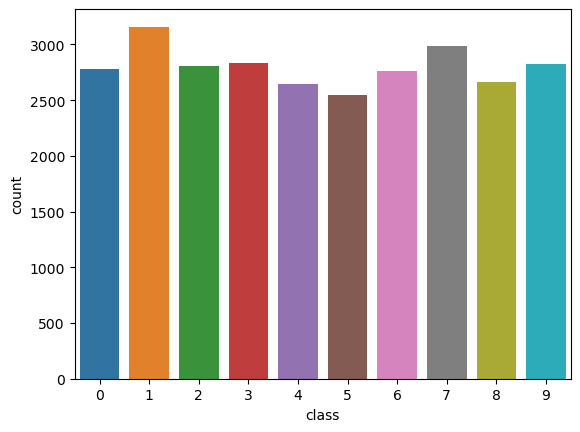

In [13]:
sns.countplot(x = test_df['class'],data=test_df)

In [14]:
train_df.iloc[1,:]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
class         6
Name: 4660, Length: 785, dtype: object

In [15]:

arr = train_df.drop('class',axis=1).iloc[1,:]
arr.shape
arr = arr.values.reshape(28,28)
arr.shape



(28, 28)

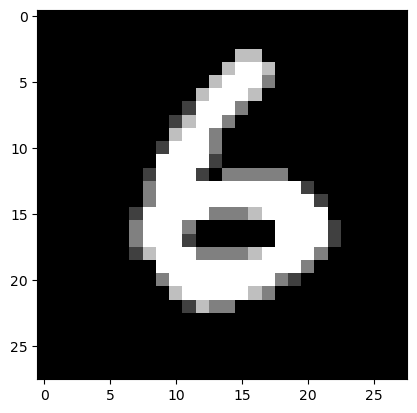

In [16]:
plt.imshow(arr,cmap='gray')

In [17]:
y = train_df['class']

X = train_df.drop(columns = 'class')

print(train_df.shape)

(42000, 785)


In [18]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
46730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
48393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
41416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
34506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
43725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
45129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
24438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
28932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [19]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)


In [21]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9148412698412698 

[[1208    0    6    1    5    3    6    2    3    0]
 [   0 1365    5    3    2    2    1    5    8    0]
 [  11   14 1148   20   21    4   13   14   20    1]
 [  10    7   28 1158    3   37    1    8   19    5]
 [   1    5    9    1 1172    4   17    6    2   60]
 [  19    4   13   56   13  964   16    2   23   11]
 [  11    3   13    4    7   15 1141    0    3    0]
 [   2   13   17    8   15    2    0 1198    2   65]
 [   8   29   20   49   10   26   11   13 1037   10]
 [   9    5    8   20   49    6    2   57   11 1136]]


In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
plt.show()

In [24]:
prediction_comparison = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})

print("True vs Predicted Labels:")
print(prediction_comparison)


accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
print("\nConfusion Matrix:")
print(cm)

True vs Predicted Labels:
      True Label Predicted Label
863            2               2
22804          9               7
46427          3               5
32994          6               6
62510          1               1
...          ...             ...
64112          8               8
16665          1               1
52333          9               9
69897          0               0
34189          6               6

[12600 rows x 2 columns]

Accuracy: 0.9148412698412698

Confusion Matrix:
[[1208    0    6    1    5    3    6    2    3    0]
 [   0 1365    5    3    2    2    1    5    8    0]
 [  11   14 1148   20   21    4   13   14   20    1]
 [  10    7   28 1158    3   37    1    8   19    5]
 [   1    5    9    1 1172    4   17    6    2   60]
 [  19    4   13   56   13  964   16    2   23   11]
 [  11    3   13    4    7   15 1141    0    3    0]
 [   2   13   17    8   15    2    0 1198    2   65]
 [   8   29   20   49   10   26   11   13 1037   10]
 [   9    5    8   20   49

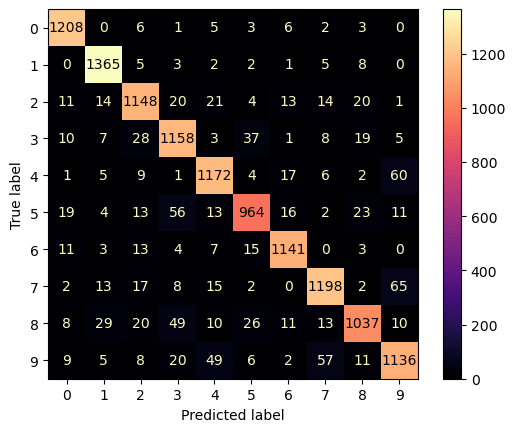

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')  
plt.show()

In [26]:
# Step 1: Import necessary libraries for PCA and plotting
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np



In [27]:

# Step 2: Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)  # Use the scaled data (X_scaled)



In [28]:
# Step 3: Train the SVM model on the reduced data
model_linear = SVC(kernel='linear', C=1.0)  # You can adjust the C parameter as needed
model_linear.fit(X_reduced, y)



SVC(kernel='linear')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

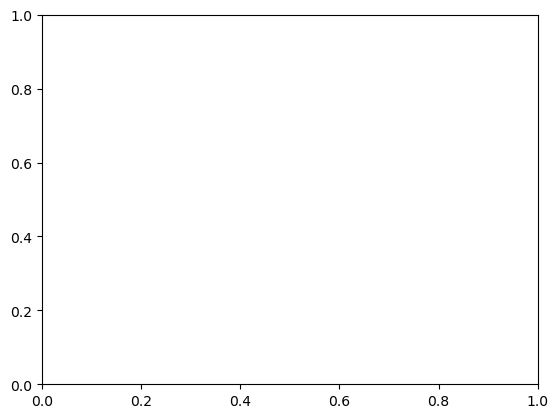

In [29]:
# Step 4: Create a mesh grid for plotting the decision boundaries
h = .02  # Step size in the mesh grid
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



In [ ]:
# Step 5: Predict over the entire grid
Z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6:  Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Step 7: Plot the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("SVM Decision Boundaries on PCA-reduced Data")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Result:

SVM on multiple classes has been applied on non linear seperable data